**Determining Fluorescence of Genetically Encoded Calcium Indicators (GECIs) Relative to Light Brightness Levels**

***How to predict Fluorescence levels of GECIs relative to the brightness of laser light.***

*How does this work?*

*A hills function exponential decay regression model is fitted to collected light intensity and fluorescence data for the following GECIs.*

The following GECIs can be modeled in the program:
GCAMP6f, GCAMP6s
GCAMP7b, GCAMP7c, GCAMP7f, GCAMP7s
GCAMP8f, GCAMP8m, GCAMP8s,
GCAMP2
XGCAMPgf

***Setup***

In [ ]:
from cleo.light import LightDependent
from cleo.imaging.sensors import sensors
from cleo.base import SynapseDevice
from cleo.imaging import Dictionaries

GECI_str = input("What kind of GECI is it?")
light_intensity = float(input("put the light intensity value here"))
wavelength = int(input("put the wavelength value here"))

cal_model = sensors.DynamicCalcium(Ca_rest=50 * nmolar, gamma=92.3/second, B_T=200*umolar, kappa_S=110, dCa_T=7.6*umolar)
bind_model_str = str.lower(input("Do you want a Double Exponential Calcium Binding Activation Model?"))
if ('y' in bind_model_str):
    bind_model_bool = True
else:
    bind_model_bool = False
exp_model_str = str.lower(input("Do you want a light excitation model?"))
if ('y' in exp_model_str):
    exp_model_bool = True
else:
    exp_model_bool = False

params_dict = Dictionaries.Light_Intensity_Dict[GECI_str]
params_w = Dictionaries.Light_Intensity_Dict[GECI_str]

ld_geci = sensors.LightDependentGECI(name=GECI_str,
                          A=params_dict['A'], baseline=params_dict['baseline'], k=params_dict['k'], x=light_intensity, n=params_dict['n'],
                          ec50=params_dict['ec50'], baseline_w=params_w['baseline_w'], w=wavelength, A1=params_w['A1'], sigma1=params_w['sigma1'],
                          A2=params_w['A2'], sigma2=params_w['sigma2'], mu1=params_w['mu1'], mu2=params_w['mu2'],
                          cal_model=cal_model, bind_act_bool=bind_model_bool, exc_bool=exc_model_bool)

dFF = ldgeci.fluorescence(model, light_intensity, wavelength)
print(f"dF/F is: {dFF})

So to run the program you must first specify the specific genetically encoded calcium indicator (GECI) that you want to use followed by the wavelength and brightness levels that you want to model the indicator at. There will also be a need to define and answer which kinds of binding activation and excitation model you want to use for your model defined via a boolean value that the model can then use to set up these binding activation and excitation models. 

After you run the results and print dFF = ldgeci.fluorescence(model, light_intensity, wavelength). The result then gives you the projected normalized fluorescence level at that point. 

The way that the program works is by using previous research on GECI fluorescence levels relative to the brightness levels and mapping the data with a hills function model with exponential decay terms as well. To see the parameters of the interpolation model you can run: ldgeci.LightDependentParams(GECI_str) where GECI_str is a string representing the GECI model type. 

Here is also an example of the interpolation's fit with the model data for brightness to fluorescence level:

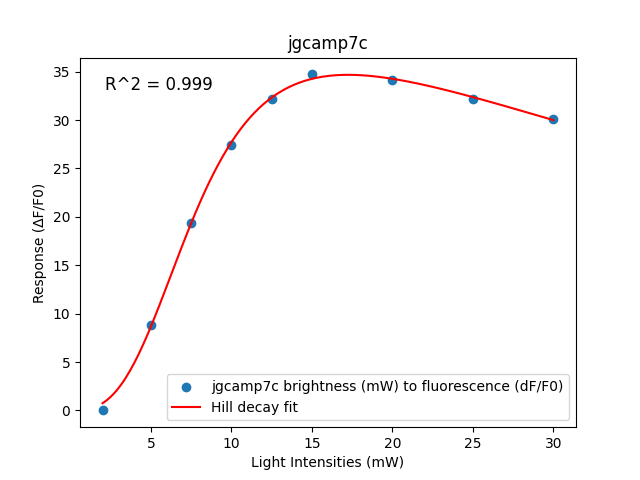

For wavelength relative to the fluorescence level the data is collected with a multinormal log distribution as shown here:

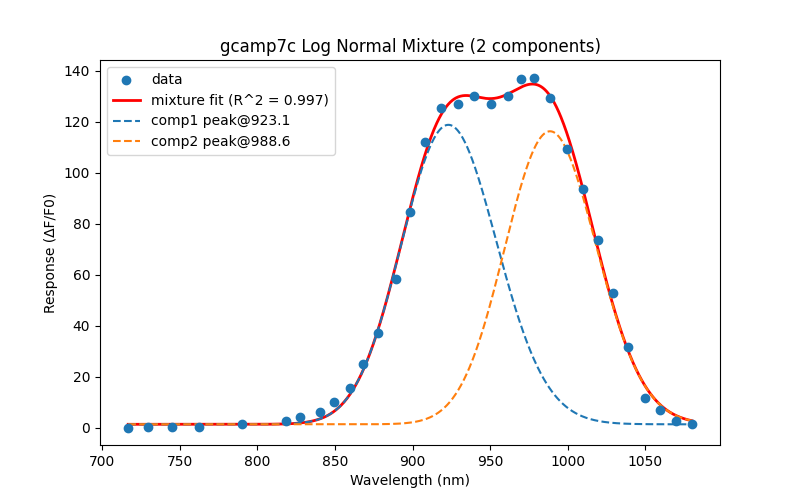

The interpolation function's values from the given wavelength and brightness are then taken and multiplied together to generate the predicted normalized fluorescence values.